In [1]:
import sys
#sys.path.append(r'C:\users\chen4\miniconda3\envs\sccube\lib\site-packages\sccube-2.0.0-py3.8.egg')
#print(sys.path)
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
import os
current_path = os.getcwd()
print("当前路径:", current_path)

当前路径: D:\2025春夏学期\CMML3\ICA2\scCube\tutorial


In [3]:
model = scCube()

In [4]:
# adata and model are downloaded from https://github.com/ZJUFanLab/scCube/blob/main/tutorial/statistics.md
sc_adata = sc.read_h5ad('./demo_data/Tabula_Muris_TM_facs_Brain_Non_Myeloid_adata.h5ad')

In [5]:
generate_sc_meta, generate_sc_data = model.load_vae_and_generate_cell(
    sc_adata=sc_adata,
    celltype_key='Cell_type',
    cell_key='Cell',
    target_num=None,
    hidden_size=128,
    load_path='demo_data/Tabula_Muris_TM_facs_Brain_Non_Myeloid_epoch10000.pth',
    used_device='cpu')


generating by the proportion of cell types of the input scRNA-seq data...
loading model from demo_data/Tabula_Muris_TM_facs_Brain_Non_Myeloid_epoch10000.pth
vae loading done!


Generate Epoch: 0: 100%|██████████████████████████████████████████████████████████| 3401/3401 [00:05<00:00, 582.13it/s]

generated done!
data have been prepared!


In [7]:
sc_adata_generate = model.pre_process(sc_data=generate_sc_data, 
                                      sc_meta=generate_sc_meta,
                                      is_normalized=True)

sc.pp.highly_variable_genes(sc_adata_generate, flavor="seurat_v3", n_top_genes=2000)
sc_adata_generate = sc_adata_generate[:, sc_adata_generate.var.highly_variable]
sc.pp.scale(sc_adata_generate, max_value=10)
sc.tl.pca(sc_adata_generate, svd_solver='arpack')
sc.pp.neighbors(sc_adata_generate)
sc.tl.umap(sc_adata_generate)


In [8]:
# generate spatial patterns for each celltypes first
generate_sc_data_new, generate_sc_meta_new = model.generate_pattern_random(
    generate_sc_data=generate_sc_data,
    generate_sc_meta=generate_sc_meta,
    set_seed=True,
    seed=12345,
    spatial_cell_type=None,
    spatial_dim=2,
    spatial_size=30,
    delta=10,
    lamda=0.75,)


generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...


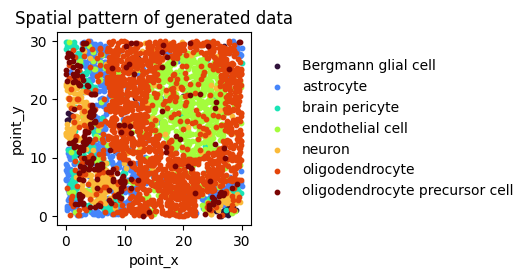

In [9]:
plot_spatial_pattern_scatter(
    obj=generate_sc_meta_new,
    figwidth=2.5,
    figheight=2.5,
    dim=2,
    x="point_x",
    y="point_y",
    label='Cell_type',
    colormap='turbo',
    size=10,
    alpha=1)
plt.show()



generating spot-based ST data with 5 cells per spot...
generating with the spot layout and neighborhood structure of Slide-seq (random)...
generating with whole genes...
generating spot-based ST data with 10 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spot-based ST data with 20 cells per spot...
generating with the spot layout and neighborhood structure of Visium (hex)...
generating with whole genes...
generating spot-based ST data with 30 cells per spot...
generating with the spot layout and neighborhood structure of ST (square)...
generating with whole genes...
generating spot-based ST data with 50 cells per spot...
generating with the spot layout and neighborhood structure of ST (square)...
generating with whole genes...
generating spot-based ST data with 100 cells per spot...
generating with the spot layout and neighborhood structure of ST (square)...
generating with whole genes...


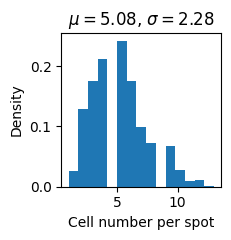

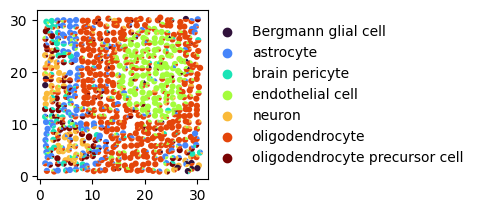

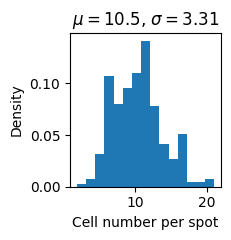

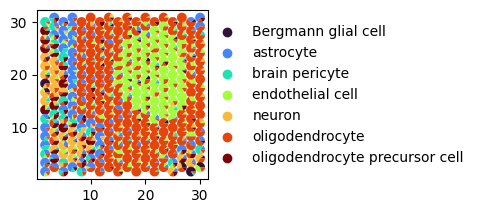

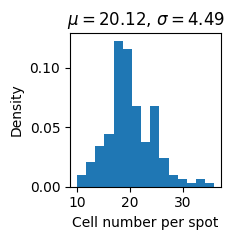

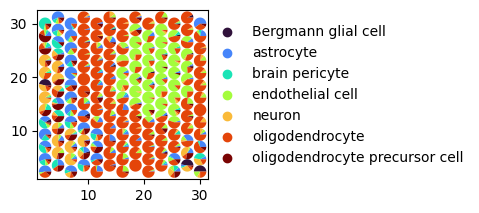

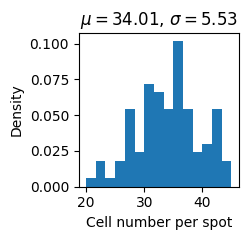

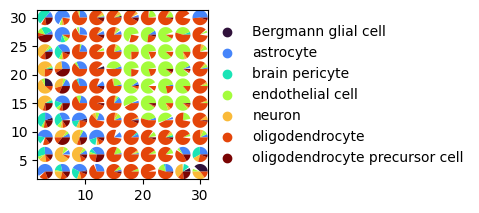

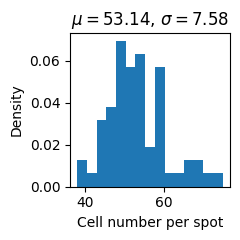

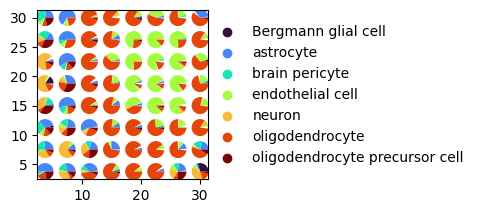

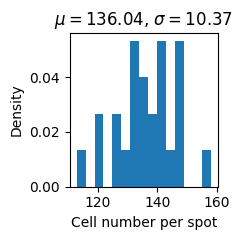

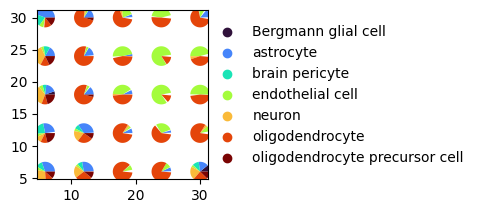

In [10]:
# n_cell
size_list = [20, 50, 80, 120, 150, 200]
n_cell_list = [5, 10, 20, 30, 50, 100]
platform_list = ['Slide', 'Visium', 'Visium', 'ST', 'ST', 'ST'] 
for i in range(6):
    st_data, st_meta, st_index = model.generate_spot_data_random(
        generate_sc_data=generate_sc_data_new,
        generate_sc_meta=generate_sc_meta_new,
        platform=platform_list[i],
        gene_type='whole',
        n_cell=n_cell_list[i]
    )
    
    plot_spot_histplot(
        obj=st_index,
        figwidth=2.5,
        figheight=2.5,
        label='spot',
        n_bins=15)
    
    prop = calculate_spot_prop(
        obj=st_index,
        cell_id='Cell',
        label='Cell_type',
        spot_id='spot')
    
    plot_spot_scatterpie(
        obj=prop,
        figwidth=2.2,
        figheight=2.2,
        x="spot_x",
        y="spot_y",
        colormap='turbo',
        res=50,
        direction="+",
        start=0.0,
        size=size_list[i],
        edgecolor='none')
    
plt.show()